<a href="https://colab.research.google.com/github/Kotyga/MIPT_python_HW_4/blob/main/hw_4_kotyga_mm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-info">

<center>
Работа студента 1 курса магистратуры МФТИ <br/> Котыги Майи Максимовны
</center>

In [ ]:
!pip install -q -U kaggle_environments

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from kaggle_environments import make, evaluate

In [ ]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def make_file(line, cell):
    """
    Создает файл с указанным именем и записывает в него содержимое ячейки.

    Параметры:
    ----------
    line : str
        Имя файла, который будет создан. Путь к файлу должен быть указан без пробелов в начале и в конце.

    cell : str
        Содержимое ячейки, которое будет записано в файл. Это может быть любой текст.

    Примечания:
    ----------
    Функция открывает файл в режиме записи ('w'). Если файл с указанным именем уже существует,
    его содержимое будет перезаписано.
    """
    file_name = line.strip()
    with open(file_name, 'w') as f:
        f.write(cell)


В новой версии возникло предупреждение при использовании %%writefile:

> /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

Поэтому напишу кастомную функцию, которая повторяет функционал этого блока кода

### 1. Агент всегда играет "камень"

In [ ]:
%%make_file rock_agent.py

def rock_agent(observation, configuration):
    """
    Агент, который всегда выбирает камень в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает 0, что соответствует выбору камня.
    """
    return 0


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-98.0, 98.0]]

### 2. Агент всегда играет "бумагу"

In [ ]:
%%make_file paper_agent.py

def paper_agent(observation, configuration):
    """
    Агент, который всегда выбирает бумагу в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает 1, что соответствует выбору бумаги.
    """
    return 1

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes
)

[[-97.0, 97.0]]

### 3. Агент всегда играет "ножницы"

In [ ]:
%%make_file scissors_agent.py

def scissors_agent(observation, configuration):
    """
    Агент, который всегда выбирает ножницы в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает 2, что соответствует выбору ножниц.
    """
    return 2

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["scissors_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-99.0, 99.0]]

### 4. Агент всегда играет разные значения

In [ ]:
%%make_file random_opponent.py

import random

def random_opponent(observation, configuration):
    """
    Агент, который выбирает случайный ход в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает случайное целое число, соответствующее одному из доступных ходов:
        0 - камень, 1 - бумага, 2 - ножницы.
    """
    return random.randrange(0, configuration.signs)

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["random_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

### 5. Агент производит то же действие, что и оппонент на прошлом ходу

In [ ]:
%%make_file copy_opponent.py

import random

def copy_opponent(observation, configuration):
    """
    Агент, который повторяет последний ход противника в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает последний ход противника, если это не первый шаг игры.
        В противном случае возвращает случайное целое число, соответствующее одному из доступных ходов:
        0 - камень, 1 - бумага, 2 - ножницы.
    """
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-22.0, 22.0]]

### 6. Агент производит действие + 1 к тому, что использовал оппонент на прошлом ходу

In [ ]:
%%make_file copynext_opponent.py

import random


def copynext_opponent(observation, configuration):
    """
    Агент, который выбирает ход, следующий за последним ходом противника в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает ход, следующий за последним ходом противника:
        - Если противник выбрал камень (0), агент выберет бумагу (1).
        - Если противник выбрал бумагу (1), агент выберет ножницы (2).
        - Если противник выбрал ножницы (2), агент выберет камень (0).
        В случае первого хода возвращает случайное целое число, соответствующее одному из доступных ходов.
    """
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["copynext_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[57.0, -57.0]]

### 7. Агент производит действие - 1 к тому, что использовал оппонент на прошлом ходу

In [ ]:
%%make_file copyprevious_opponent.py

import random

def copyprevious_opponent(observation, configuration):
    """
    Агент, который выбирает ход, побеждающий предыдущий ход противника в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает ход, побеждающий предыдущий ход противника:
        - Если противник выбрал камень (0), агент выберет ножницы (2).
        - Если противник выбрал бумагу (1), агент выберет камень (0).
        - Если противник выбрал ножницы (2), агент выберет бумагу (1).
        В случае первого хода возвращает случайное целое число, соответствующее одному из доступных ходов.
    """
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % configuration.signs
    else:
        return random.randrange(0, configuration.signs)

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["copyprevious_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-99.0, 99.0]]

### 8. Агент равновероятно играет то, что не выкинул противник на прошлом ходу

In [ ]:
%%make_file opposit_agent.py

import random

def opposit_agent(observation, configuration):
    """
    Агент, который выбирает ход, противоположный последнему ходу противника в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает ход, противоположный последнему ходу противника:
        - Если противник выбрал камень (0), агент выбирает случайно между бумагой (1) и ножницами (2).
        - Если противник выбрал бумагу (1), агент выбирает случайно между камнем (0) и ножницами (2).
        - Если противник выбрал ножницы (2), агент выбирает случайно между бумагой (1) и камнем (0).
        В случае первого хода возвращает случайное целое число, соответствующее одному из доступных ходов.
    """
    if observation.step > 0:
        if observation.lastOpponentAction == 0:
            return random.choice([1, 2])
        elif observation.lastOpponentAction == 1:
            return random.choice([0, 2])
        else:
            return random.choice([1, 0])
    else:
        return random.randrange(0, configuration.signs)

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["opposit_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

### 9. Агент выбрасывает три раза одно и то же, после чего меняет выбор на следующее случайное

In [ ]:
%%make_file random3_opponent.py

import random

counter = 0
stable_sign = None

def random3_opponent(observation, configuration):
    """
    Агент, который делает случайные ходы с некоторой периодичностью.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает целое число, соответствующее одному из доступных ходов:
        0 - камень, 1 - бумага, 2 - ножницы.
        На первом ходе и каждые три хода после двух ходов будет выбран случайный ход.
    """
    global counter
    global stable_sign

    if observation.step == 0:
        stable_sign = random.randrange(0, configuration.signs)
    elif counter % 3 == 2:
        stable_sign = random.randrange(0, configuration.signs)
    counter += 1

    return stable_sign

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["random3_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-23.0, 23.0]]

### 10. Агент производит то же действие, если выиграл, и меняет на +1, если нет

In [ ]:
%%make_file win_reaction1.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_reaction1(observation, configuration):
    """
    Агент, который реагирует на действия противника, изменяя свой ход в зависимости от предыдущих действий.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе выбирается случайный ход. В последующих ходах агент изменяет свой ход,
        если он не выиграл в предыдущем раунде.
    """
    global lastAction
    if observation.step == 0:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор на первом ходе
    elif get_score(lastAction, observation.lastOpponentAction) < 1:
        lastAction = (lastAction + 1) % configuration.signs  # Изменение хода в случае проигрыша
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_reaction1.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[27.0, -27.0]]

### 11. Агент производит то же действие, если выиграл, и меняет на -1, если проиграл

In [ ]:
%%make_file win_reaction2.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_reaction2(observation, configuration):
    """
    Агент, который реагирует на действия противника, изменяя свой ход в зависимости от предыдущих действий.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе выбирается случайный ход. В последующих ходах агент изменяет свой ход,
        если он не выиграл в предыдущем раунде, выбирая ход, который побеждает предыдущий ход противника.
    """
    global lastAction
    if observation.step == 0:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор на первом ходе
    elif get_score(lastAction, observation.lastOpponentAction) < 1:
        lastAction = (lastAction + 2) % configuration.signs  # Изменение хода в случае проигрыша
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_reaction2.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[58.0, -58.0]]

### 12. Агент производит то же действие, если выиграл, и меняет на действие оппонента, если проиграл

In [ ]:
%%make_file win_opposit1.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_opposit1(observation, configuration):
    """
    Агент, который выбирает ход, соответствующий последнему ходу противника в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе выбирается случайный ход. В последующих ходах агент выбирает ход,
        соответствующий последнему ходу противника, если он не выиграл в предыдущем раунде.
    """
    global lastAction
    if observation.step == 0:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор на первом ходе
    elif get_score(lastAction, observation.lastOpponentAction) < 1:
        lastAction = observation.lastOpponentAction  # Повторяет последний ход противника
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_opposit1.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-20.0, 20.0]]

### 13. Агент производит то же действие, если проиграл, и меняет на действие оппонента, если выиграл

In [ ]:
%%make_file win_opposit2.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_opposit2(observation, configuration):
    """
    Агент, который выбирает ход, соответствующий последнему ходу противника, если он выигрывает.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе выбирается случайный ход. В последующих ходах агент выбирает ход,
        соответствующий последнему ходу противника, если он выиграл в предыдущем раунде.
    """
    global lastAction
    if observation.step == 0:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор на первом ходе
    elif get_score(lastAction, observation.lastOpponentAction) == 1:
        lastAction = observation.lastOpponentAction  # Повторяет последний ход противника, если выиграл
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_opposit2.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-99.0, 99.0]]

### 14. Агент производит то же действие, если выиграл, и меняет на рандомное, если проиграл

In [ ]:
%%make_file win_random1.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_random1(observation, configuration):
    """
    Агент, который выбирает случайный ход, если он не выиграл в предыдущем раунде.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе или в случае проигрыша выбирается случайный ход.
    """
    global lastAction
    if observation.step == 0 or get_score(lastAction, observation.lastOpponentAction) < 1:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_random1.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[28.0, -28.0]]

### 15. Агент производит то же действие, если проиграл, и меняет на рандомное, если выиграл

In [ ]:
%%make_file win_random2.py

import math
import random

def get_score(left_move, right_move):
    """
    Вычисляет результат сравнения двух ходов в игре «камень-ножницы-бумага».

    Параметры:
    ----------
    left_move : int
        Ход первого игрока (0 - камень, 1 - бумага, 2 - ножницы).

    right_move : int
        Ход второго игрока (0 - камень, 1 - бумага, 2 - ножницы).

    Возвращает:
    ----------
    float
        Возвращает 1, если первый игрок выигрывает, -1, если проигрывает,
        и 0, если ничья.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

lastAction = None

def win_random2(observation, configuration):
    """
    Агент, который выбирает случайный ход, если он выиграл в предыдущем раунде.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на его предыдущем ходе и ходе противника.
        На первом ходе или в случае выигрыша выбирается случайный ход.
    """
    global lastAction
    if observation.step == 0 or get_score(lastAction, observation.lastOpponentAction) == 1:
        lastAction = random.randrange(0, configuration.signs)  # Случайный выбор
    return lastAction

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["win_random2.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-98.0, 98.0]]

### 16. Агент играет по очереди камень, бумагу, ножницы

In [ ]:
%%make_file sequence_agent.py

counter = -1

def sequence(observation, configuration):
    """
    Агент, который выбирает ход в фиксированной последовательности: камень, бумага, ножницы.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента в последовательности:
        - 0 - камень
        - 1 - бумага
        - 2 - ножницы
    """
    global counter
    counter += 1
    if counter % 3 == 0:
        return 0
    elif counter % 3 == 1:
        return 1
    else:
        return 2

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["sequence_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

###17. Агент предсказатель

Эта стратегия пытается предсказать следующий ход противника, основываясь на его предыдущих действиях. Она отслеживает, какие ходы противник использовал чаще всего, и выбирает ход, который побеждает его наиболее вероятный следующий ход

In [ ]:
%%make_file predict_agent.py

import random

opponent_moves = {0: 0, 1: 0, 2: 0}

def predictor_agent(observation, configuration):
    """
    Агент, который предсказывает следующий ход противника на основе его предыдущих действий.

    Параметры:
    ----------
    observation : object
        Объект, содержащий информацию о текущем состоянии игры, включая шаги и действия противника.

    configuration : object
        Объект, содержащий настройки игры, такие как количество доступных знаков.

    Возвращает:
    ----------
    int
        Возвращает следующий ход агента, основываясь на наиболее частом ходе противника:
        - 0 - камень
        - 1 - бумага
        - 2 - ножницы
        На первом ходе выбирается случайный ход.
    """
    global opponent_moves

    if observation.step == 0:
        return random.randrange(0, configuration.signs)

    last_move = observation.lastOpponentAction
    opponent_moves[last_move] += 1

    most_common_move = max(opponent_moves, key=opponent_moves.get)

    if most_common_move == 0:
        return 1
    elif most_common_move == 1:
        return 2
    elif most_common_move == 2:
        return 0

In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["predict_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

# Турнир
Составим список агентов, потом заставим их сыграть между собой по количеству times партий.
Получившуюся статистику побед запишем в словарь и выведем в виде таблицы pandas

In [ ]:
agents = ['rock_agent.py',
          'paper_agent.py',
          'scissors_agent.py',
          'random_opponent.py',
          'copy_opponent.py',
          'copynext_opponent.py',
          'copyprevious_opponent.py',
          'opposit_agent.py',
          'random3_opponent.py',
          'win_reaction1.py',
          'win_reaction2.py',
          'win_opposit1.py',
          'win_opposit2.py',
          'win_random1.py',
          'win_random2.py',
          'sequence_agent.py',
          'predict_agent.py']


rank = {agent: 0 for agent in agents}

for times in range(3):

    for i in range(len(agents)):
        for j in range(i+1, len(agents)):
            e = evaluate(
            "rps", #environment to use - no need to change
            [agents[i], agents[j]], #agents to evaluate
            configuration={"episodeSteps": 100, 'tieRewardThreshold': 1} #number of episodes
            )
            if e[0][0] > e[0][1]:
                rank[agents[i]] += 1
            elif e[0][0] < e[0][1]:
                rank[agents[j]] += 1

# Турнирная таблица

In [ ]:
rank_se = pd.Series(rank, name="Рейтинг турнира по количеству выигранных партий").sort_values(ascending=False).to_frame()
rank_se

,Рейтинг турнира по количеству выигранных партий
copynext_opponent.py,38
win_reaction1.py,34
win_reaction2.py,33
win_random1.py,31
predict_agent.py,25
opposit_agent.py,23
random_opponent.py,23
random3_opponent.py,21
scissors_agent.py,21
win_opposit1.py,17


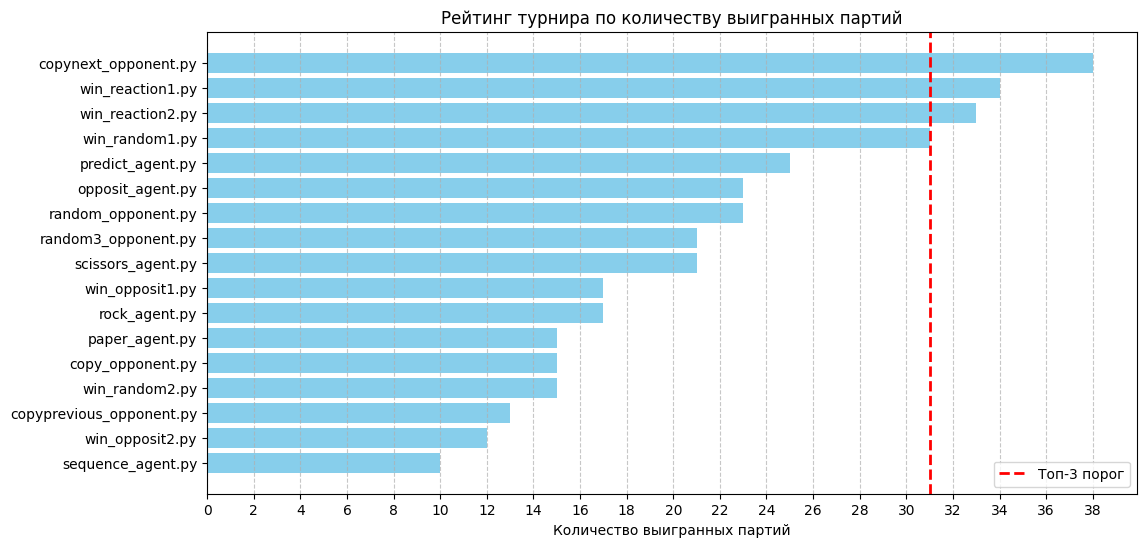

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(rank_se.index.tolist(), sum(rank_se.values.tolist(), []) , color='skyblue')
plt.xlabel('Количество выигранных партий')
plt.title('Рейтинг турнира по количеству выигранных партий')
plt.gca().invert_yaxis()
plt.xticks(range(0, max(sum(rank_se.values.tolist(), []) ) + 1, 2))
plt.grid(axis='x', linestyle='--', alpha=0.7)

top_3_wins = sum(rank_se.values.tolist(), [])[:4]
top_3_threshold = min(top_3_wins)

plt.axvline(x=top_3_threshold, color='red', linestyle='--', linewidth=2, label='Топ-3 порог')

plt.legend()

plt.show()